Porcentaje de avance: 0.0%


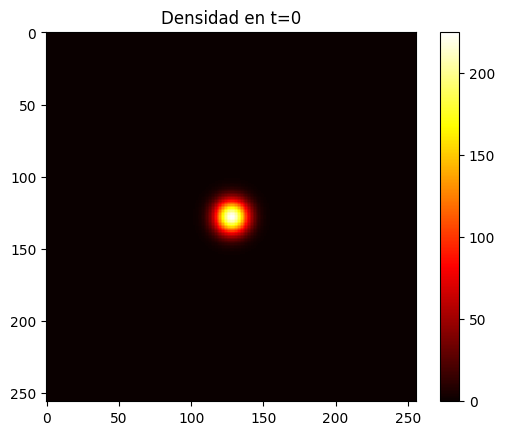

Porcentaje de avance: 1.0%
Porcentaje de avance: 2.0%
Porcentaje de avance: 3.0%
Porcentaje de avance: 4.0%
Porcentaje de avance: 5.0%
Porcentaje de avance: 6.0%
Porcentaje de avance: 7.0%
Porcentaje de avance: 8.0%
Porcentaje de avance: 9.0%
Porcentaje de avance: 10.0%


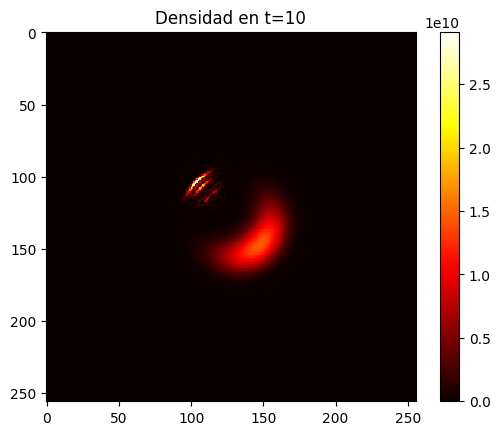

Porcentaje de avance: 11.0%
Porcentaje de avance: 12.0%
Porcentaje de avance: 13.0%
Porcentaje de avance: 14.0%
Porcentaje de avance: 15.0%
Porcentaje de avance: 16.0%
Porcentaje de avance: 17.0%
Porcentaje de avance: 18.0%
Porcentaje de avance: 19.0%
Porcentaje de avance: 20.0%


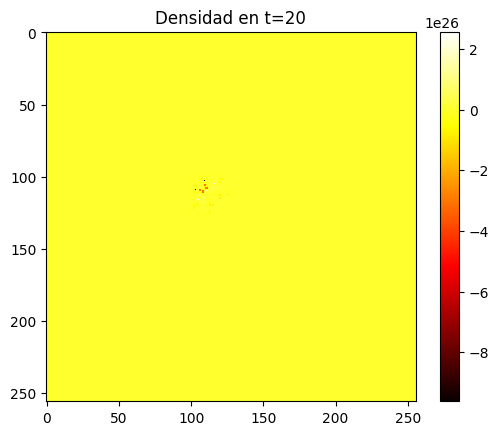

Porcentaje de avance: 21.0%
Porcentaje de avance: 22.0%
Porcentaje de avance: 23.0%
Porcentaje de avance: 24.0%
Porcentaje de avance: 25.0%
Porcentaje de avance: 26.0%
Porcentaje de avance: 27.0%
Porcentaje de avance: 28.0%
Porcentaje de avance: 29.0%
Porcentaje de avance: 30.0%


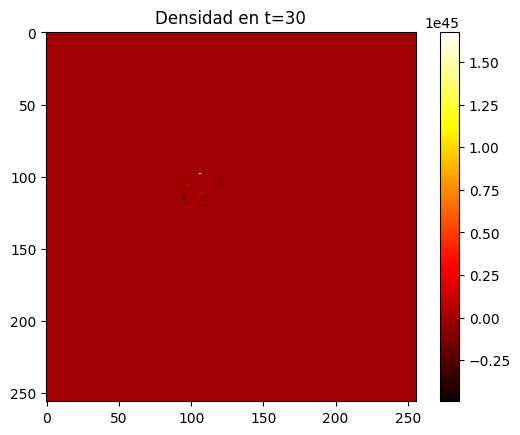

Porcentaje de avance: 31.0%
Porcentaje de avance: 32.0%
Porcentaje de avance: 33.0%
Porcentaje de avance: 34.0%
Porcentaje de avance: 35.0%
Porcentaje de avance: 36.0%
Porcentaje de avance: 37.0%
Porcentaje de avance: 38.0%
Porcentaje de avance: 39.0%
Porcentaje de avance: 40.0%


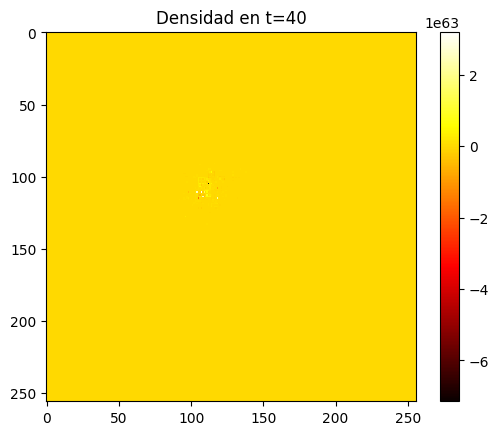

Porcentaje de avance: 41.0%
Porcentaje de avance: 42.0%
Porcentaje de avance: 43.0%
Porcentaje de avance: 44.0%
Porcentaje de avance: 45.0%
Porcentaje de avance: 46.0%
Porcentaje de avance: 47.0%
Porcentaje de avance: 48.0%
Porcentaje de avance: 49.0%
Porcentaje de avance: 50.0%


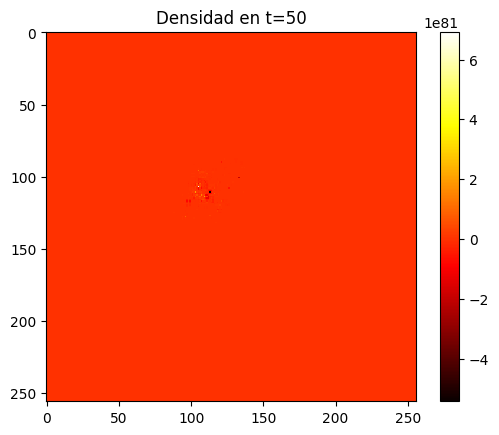

Porcentaje de avance: 51.0%
Porcentaje de avance: 52.0%
Porcentaje de avance: 53.0%
Porcentaje de avance: 54.0%
Porcentaje de avance: 55.0%
Porcentaje de avance: 56.0%
Porcentaje de avance: 57.0%
Porcentaje de avance: 58.0%
Porcentaje de avance: 59.0%
Porcentaje de avance: 60.0%


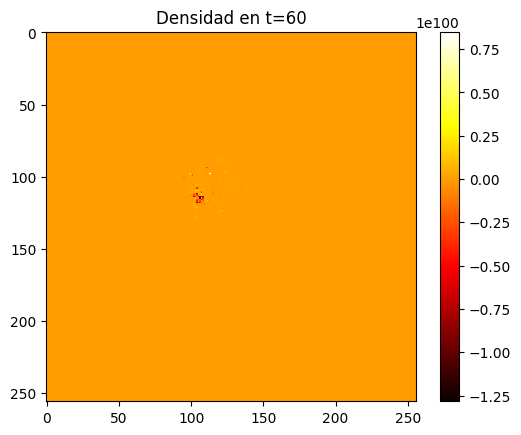

Porcentaje de avance: 61.0%
Porcentaje de avance: 62.0%
Porcentaje de avance: 63.0%
Porcentaje de avance: 64.0%
Porcentaje de avance: 65.0%
Porcentaje de avance: 66.0%
Porcentaje de avance: 67.0%
Porcentaje de avance: 68.0%
Porcentaje de avance: 69.0%
Porcentaje de avance: 70.0%


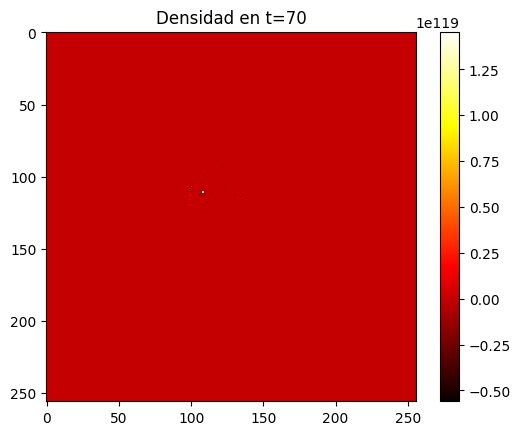

Porcentaje de avance: 71.0%
Porcentaje de avance: 72.0%
Porcentaje de avance: 73.0%
Porcentaje de avance: 74.0%
Porcentaje de avance: 75.0%
Porcentaje de avance: 76.0%
Porcentaje de avance: 77.0%
Porcentaje de avance: 78.0%
Porcentaje de avance: 79.0%
Porcentaje de avance: 80.0%


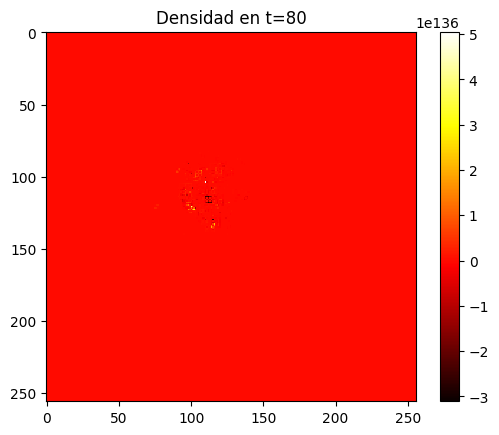

Porcentaje de avance: 81.0%
Porcentaje de avance: 82.0%
Porcentaje de avance: 83.0%
Porcentaje de avance: 84.0%
Porcentaje de avance: 85.0%
Porcentaje de avance: 86.0%
Porcentaje de avance: 87.0%
Porcentaje de avance: 88.0%
Porcentaje de avance: 89.0%
Porcentaje de avance: 90.0%


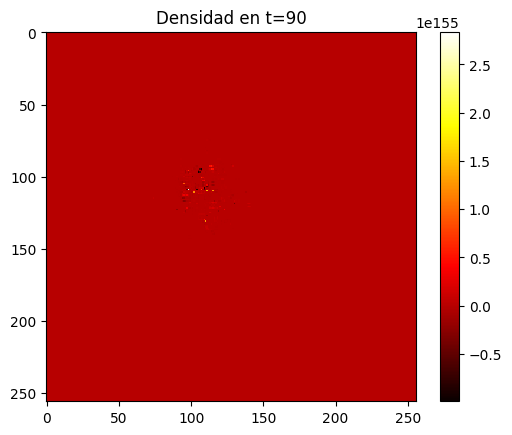

Porcentaje de avance: 91.0%
Porcentaje de avance: 92.0%
Porcentaje de avance: 93.0%
Porcentaje de avance: 94.0%
Porcentaje de avance: 95.0%
Porcentaje de avance: 96.0%
Porcentaje de avance: 97.0%
Porcentaje de avance: 98.0%
Porcentaje de avance: 99.0%
Porcentaje de avance: 100.0%


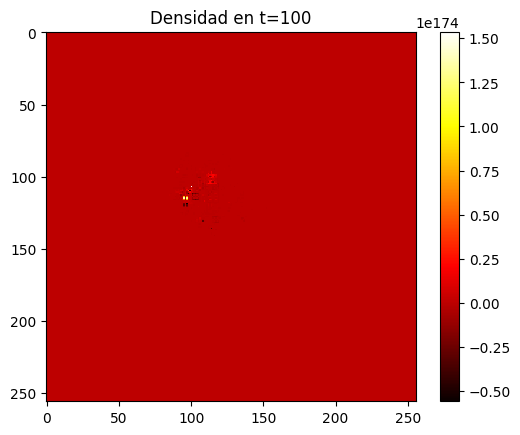

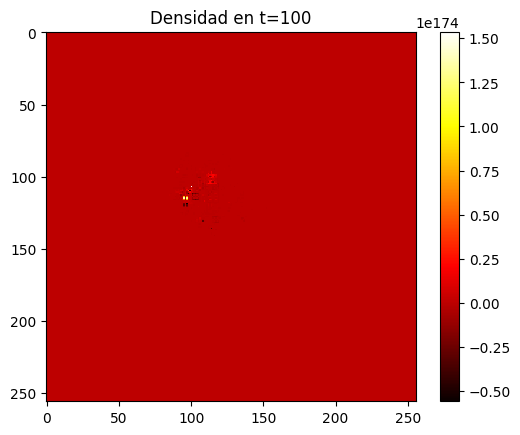

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
Lx = 256
Ly = 256
Q = 9
W0 = 1.0 / 3.0
C = 0.5
C2 = C * C
Cs2 = C2 / 3.0
tau = 0.55
Utau = 1.0 / tau
UmUtau = 1.0 - Utau

# Pesos y vectores de velocidad
w = np.array([4.0 / 9.0] + [1.0 / 9.0] * 4 + [1.0 / 36.0] * 4)
Vx = np.array([0, 1, 0, -1, 0, 1, -1, -1, 1])
Vy = np.array([0, 0, 1, 0, -1, 1, 1, -1, -1])

# Inicialización de las funciones de distribución
f = np.zeros((Lx, Ly, Q))
fnew = np.zeros_like(f)

def rho(ix, iy, UseNew):
    return np.sum(fnew[ix, iy, :]) if UseNew else np.sum(f[ix, iy, :])

def Jx(ix, iy, UseNew):
    return np.sum(Vx * fnew[ix, iy, :]) if UseNew else np.sum(Vx * f[ix, iy, :])

def Jy(ix, iy, UseNew):
    return np.sum(Vy * fnew[ix, iy, :]) if UseNew else np.sum(Vy * f[ix, iy, :])

def feq(rho0, Ux0, Uy0, i):
    UdotVi = Ux0 * Vx[i] + Uy0 * Vy[i]
    U2 = Ux0**2 + Uy0**2
    return rho0 * w[i] * (1 + UdotVi / Cs2 + (UdotVi * UdotVi) / (2 * Cs2 * Cs2) - U2 / (2 * Cs2))

def Start(rho0, Ux0, Uy0, mu_x, mu_y, sigma_x, sigma_y):
    for ix in range(Lx):
        for iy in range(Ly):
            gauss_x = np.exp(-0.5 * ((ix - mu_x) / sigma_x) ** 2) / (sigma_x * np.sqrt(2 * np.pi))
            gauss_y = np.exp(-0.5 * ((iy - mu_y) / sigma_y) ** 2) / (sigma_y * np.sqrt(2 * np.pi))
            rho = rho0 * gauss_x * gauss_y
            for i in range(Q):
                f[ix, iy, i] = feq(rho, Ux0, Uy0, i)

def Collision():
    for ix in range(Lx):
        for iy in range(Ly):
            rho0 = rho(ix, iy, False)
            Ux0 = Jx(ix, iy, False) / rho0
            Uy0 = Jy(ix, iy, False) / rho0
            for i in range(Q):
                fnew[ix, iy, i] = UmUtau * f[ix, iy, i] + Utau * feq(rho0, Ux0, Uy0, i)

def Advection():
    for ix in range(Lx):
        for iy in range(Ly):
            for i in range(Q):
                ix2 = (ix + Vx[i]) % Lx
                iy2 = (iy + Vy[i]) % Ly
                f[ix2, iy2, i] = fnew[ix, iy, i]

def Print(NameFile, t):
    with open(NameFile, 'w') as MyFile:
        for ix in range(0, Lx, 4):
            for iy in range(0, Ly, 4):
                rho0 = rho(ix, iy, True)
                MyFile.write(f"{t} {ix} {iy} {rho0}\n")
            MyFile.write("\n")

def PlotDensity(t):
    density = np.zeros((Lx, Ly))
    for ix in range(Lx):
        for iy in range(Ly):
            density[ix, iy] = rho(ix, iy, True)
    plt.imshow(density.T, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Densidad en t={t}")
    plt.show()

# Parámetros de la simulación
tmax = 100
rho0 = 10000.0
Ux0 = 0.1
Uy0 = 0.1
mu_x = Lx / 2
mu_y = Ly / 2
sigma_x = Lx / 32
sigma_y = Ly / 32

# Iniciar la simulación
Start(rho0, Ux0, Uy0, mu_x, mu_y, sigma_x, sigma_y)

# Ejecutar la simulación
for t in range(tmax + 1):
    print(f"Porcentaje de avance: {(t * 100) / tmax}%")
    Collision()
    Advection()
    if t % 10 == 0: # Imprimir cada 10 pasos de tiempo
        Print(f"Densidad_{t}.dat", t)
        PlotDensity(t)

# Imprimir los resultados finales
Print("AdvectionDifusion.dat", t)
PlotDensity(t)
